## Exercises
Create a file named seaborn_exercises.py or seaborn_exercises.ipynb for this exercise.
Use the iris database to answer the following quesitons:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
from pydataset import data
data('iris', show_doc=True)
iris = data('iris')

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

- What does the distribution of petal lengths look like?

In [4]:
# check the name of the columns
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [5]:
# rename the columns withot periods and capitalizations
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

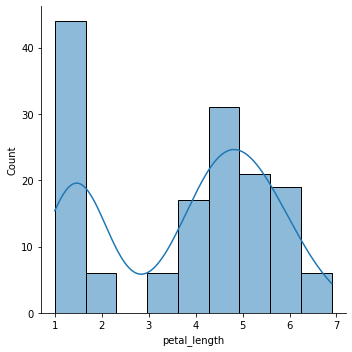

In [6]:
iris.petal_length.describe()
sns.displot(data = iris, x = 'petal_length',kde = True)

Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

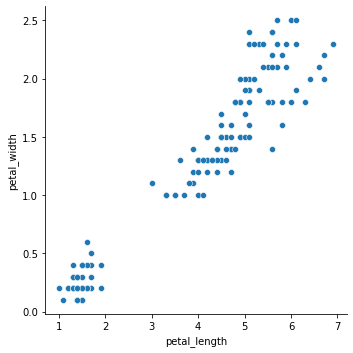

In [7]:
sns.relplot(data= iris, x = 'petal_length', y = 'petal_width')

Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

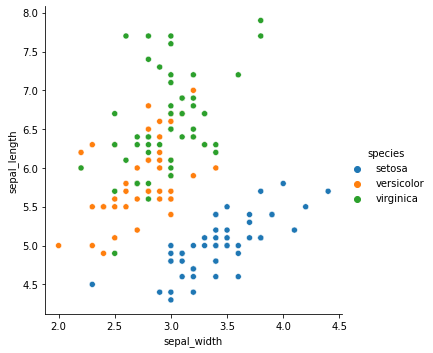

In [8]:
sns.relplot(data = iris, x = 'sepal_width', y = 'sepal_length', hue = 'species' )

Which features would be best used to predict species?

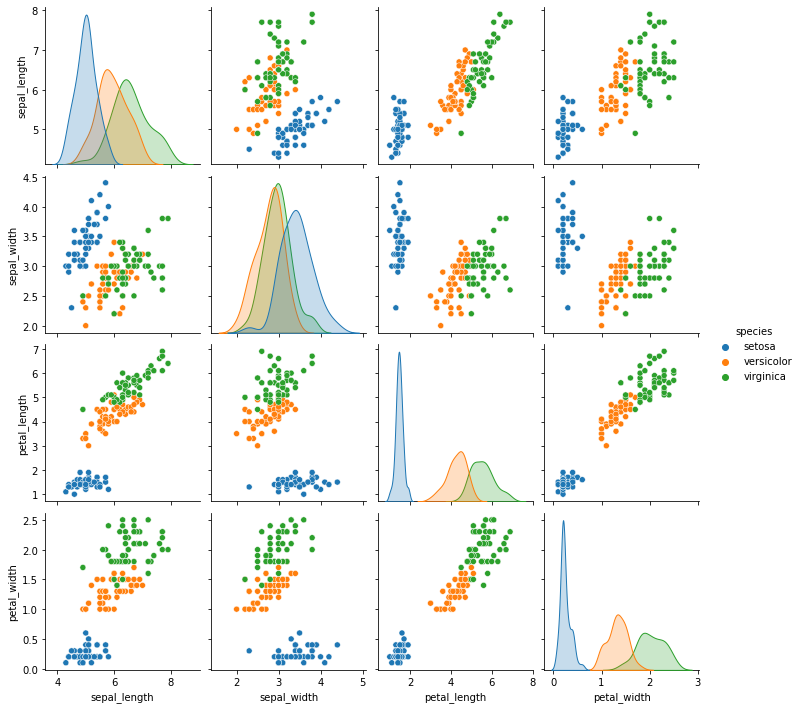

In [9]:
sns.pairplot(data = iris, hue = 'species')
# petal_width an petal_length has the best distinctions between species

1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [10]:
anscombe = sns.load_dataset('anscombe')

In [11]:
data('anscombe', show_doc=True)

anscombe

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Anscombe's Quartet of ‘Identical’ Simple Linear Regressions

### Description

Four _x_-_y_ datasets which have the same traditional statistical properties
(mean, variance, correlation, regression line, etc.), yet are quite different.

### Usage

    anscombe

### Format

A data frame with 11 observations on 8 variables.

x1 == x2 == x3

the integers 4:14, specially arranged

x4

values 8 and 19

y1, y2, y3, y4

numbers in (3, 12.5) with mean 7.5 and sdev 2.03

### Source

Tufte, Edward R. (1989) _The Visual Display of Quantitative Information_,
13–14. Graphics Press.

### References

Anscombe, Francis J. (1973) Graphs in statistical analysis. _American
Statistician_, **27**, 17–21.

### Examples

    require(stats); require(graphics)
    summary(anscombe)
    ##-- now some "magic" to do the 4 regressions in a loop:
    ff <- y ~ x
    mods <- setNames(as.list(1:4), paste0("lm", 1:4))
 

In [12]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [13]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [14]:
anscombe.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [15]:
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

anscombe.groupby('dataset').describe()

# there are 4 datasets, each dataset has 11 x's and y's  

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

- Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

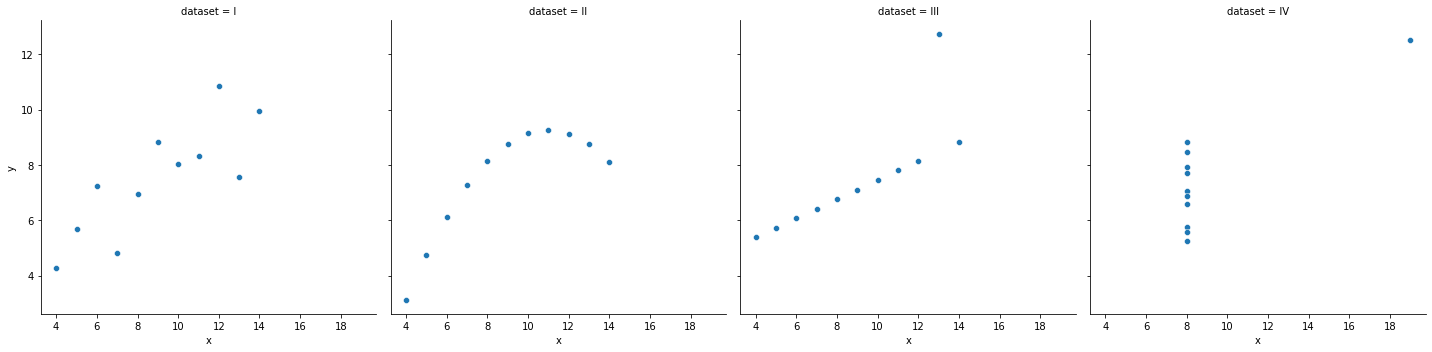

In [16]:
sns.relplot(data = anscombe, x='x', y='y', col = "dataset")

## Exercise 2
- Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [17]:
insectsprays = data('InsectSprays')
data('InsectSprays', show_doc= True)


InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

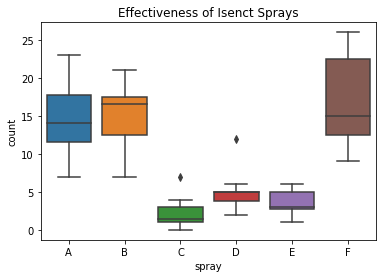

In [18]:
#Create a boxplot that shows the effectiveness of the different insect sprays.
sns.boxplot(data = insectsprays, y = 'count', x = 'spray')
plt.title('Effectiveness of Isenct Sprays')
plt.show()


- Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

    - Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
    - Does whether or not a province is Catholic influence fertility?
    - What measure correlates most strongly with fertility?

In [19]:
swiss = data('swiss')
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [20]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


 - Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [21]:
swiss['is_catholic'] = swiss.Catholic >50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


- Does whether or not a province is Catholic influence fertility?

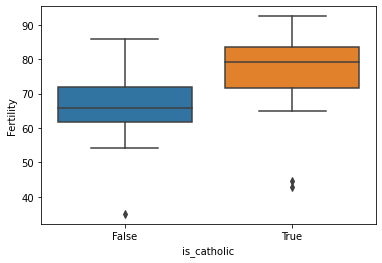

In [22]:
sns.boxplot( data = swiss, x = 'is_catholic', y = 'Fertility')
plt.show()

- What measure correlates most strongly with fertility?

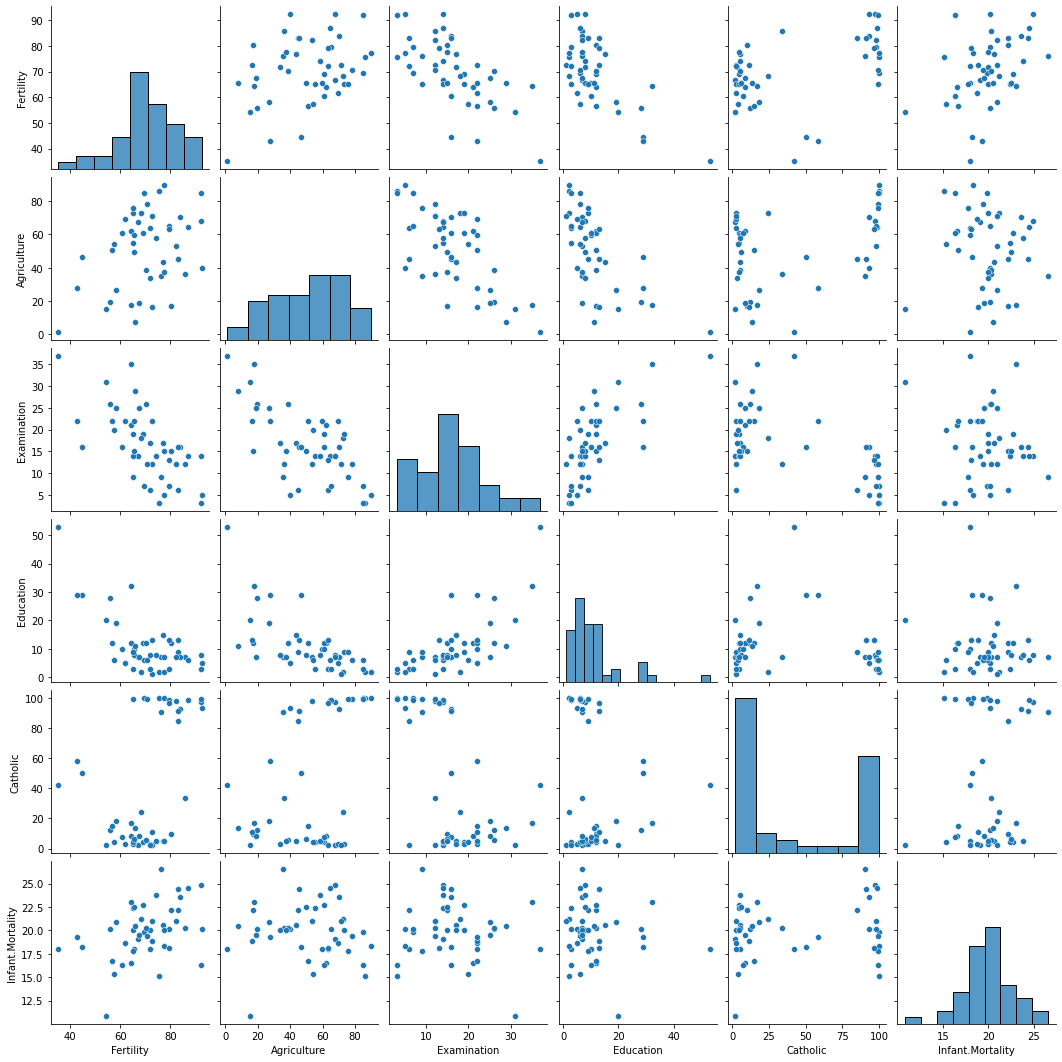

In [23]:
sns.pairplot(data=swiss.iloc[:,:-1])

In [24]:
swiss.corr()
#numner closest to 0 is agriculture

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.402813
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.410503
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.597861
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.154677
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.961723
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.166081
is_catholic,0.402813,0.410503,-0.597861,-0.154677,0.961723,0.166081,1.000000


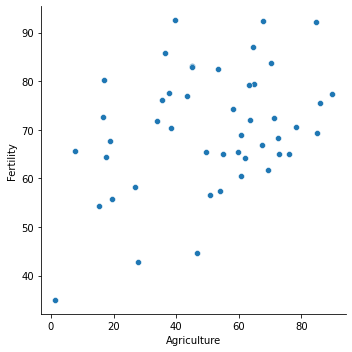

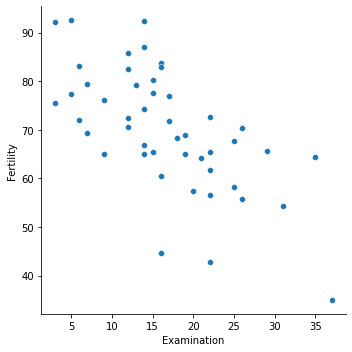

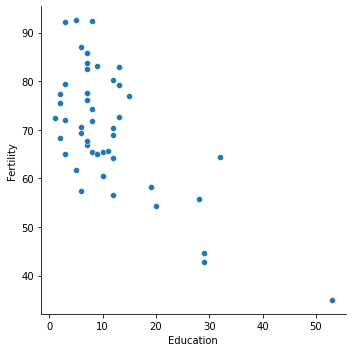

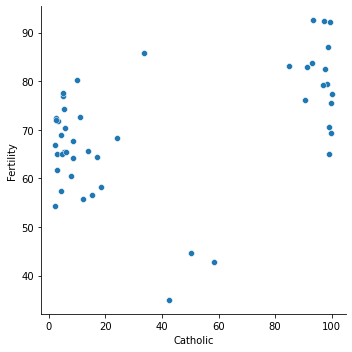

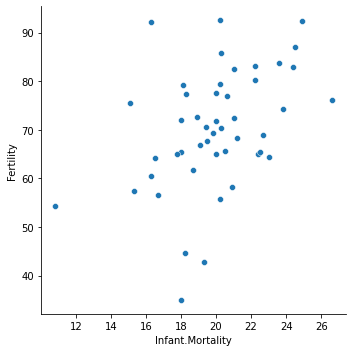

In [25]:
 for col in swiss.columns[1:-1]:
     sns.relplot(data = swiss, y = 'Fertility', x = col)

- Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [26]:
from env import get_db_url

In [27]:
url = get_db_url('chipotle')
query = "SELECT * FROM orders"
orders = pd.read_sql(query, url)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [28]:
orders['item_price'] = orders.item_price.str.strip('$').astype('float')

In [30]:
pop_items = orders.groupby('item_name').quantity.sum().nlargest(4)
pop_items

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [51]:
pop_items_rev = orders[orders.item_name.isin(pop_items.index)].groupby('item_name').item_price.sum()
pop_items_rev

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Name: item_price, dtype: float64

In [54]:
pop_items_rev = pop_items_rev.sort_values(ascending=False).reset_index()
pop_items_rev

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


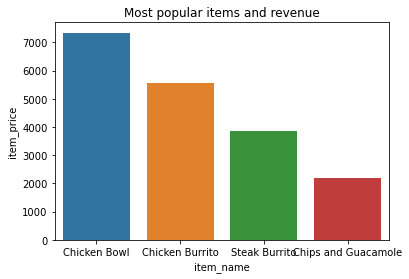

In [57]:
sns.barplot(x = 'item_name', y = 'item_price', data = pop_items_rev)
plt.title('Most popular items and revenue')
plt.show()

- Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [60]:
sleepstudy = data('sleepstudy')
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

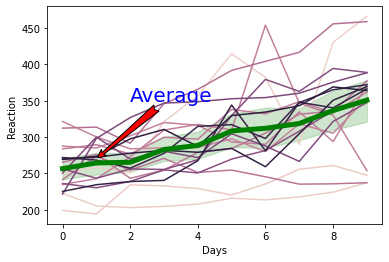

In [83]:
#  Use seaborn to create a line chart of all the individual subject's reaction times 
#  and a more prominant line showing the average change in reaction time.

sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject', legend=False)
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'g', linewidth = '5', estimator = 'mean')
plt.annotate('Average',xy = (1,270) ,xytext =(2,350), fontsize = 20, color = 'blue', arrowprops = dict(arrowstyle = 'fancy',facecolor = 'red'))
plt.show()
